# ML : Titanic

mise en oeuvre des méthodes d'apprentissage automaique (machine learning).

# Jeu de données initial

Kaggle propose des jeu de données intéressante avec parfois les méthodes permettant d'obtenir les meilleurs résultats.
Il faut utiliser la bibliohtèque Panda afin de pouvoir mettre en Data Frame les données facilement.

In [89]:
#importation des bibliothèques potentiellement utiles
from tqdm import trange
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
#importation du data set
df_titanic = pd.read_csv("titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
#on affiche les 10 premieres et 10 dernières lignes du DataFrame.
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [92]:
df_titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [93]:
#Affichez le nombre de ligne du DataFrame pour determiner le nombre de passager
df_titanic.values;
df_titanic.index;
print(df_titanic.shape)
print(df_titanic.shape[0])

(891, 12)
891


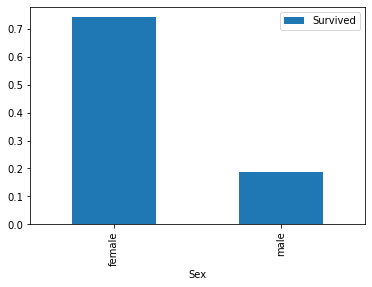

In [94]:
#on cherche à représenter le taux de survie des voyageurs en fonction des variables explicatives
#afin de vérifier leur pertinence

sex = df_titanic.pivot_table(index="Sex",values="Survived")
# Création des barres
sex.plot.bar()
plt.show()


In [95]:
#name = df_titanic.pivot_table(index="Name",values="Survived")
# Création des barres
#name.plot.bar()
#plt.show()

#comme on peut le voir ici, il n'y a pas d'intérêt à afficher les noms en fonction du taux de survie car chaque 
#survivant à un nom différent des autres. Nous pourrions faire de l'analyse socio-linguistique des noms et prénoms
#par exemple en déterminant la nationalité. Nous ferons le choix ici de supprimer les noms.

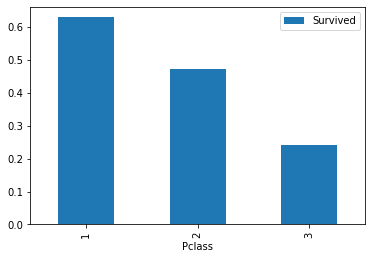

In [96]:
classe = df_titanic.pivot_table(index="Pclass",values="Survived")
# Création des barres
classe.plot.bar()
plt.show()

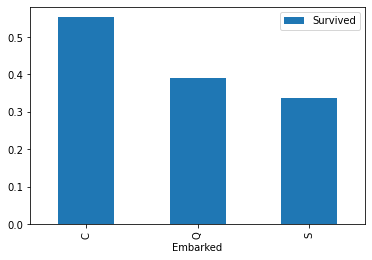

In [97]:
embarked = df_titanic.pivot_table(index="Embarked",values="Survived")
# Création des barres
embarked.plot.bar()
plt.show()

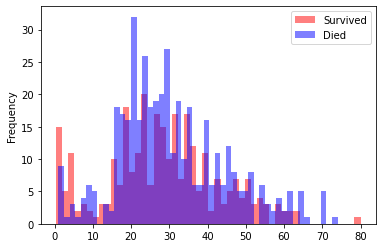

In [98]:
survived = df_titanic[df_titanic["Survived"] == 1]
died = df_titanic[df_titanic["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

0.0
512.3292


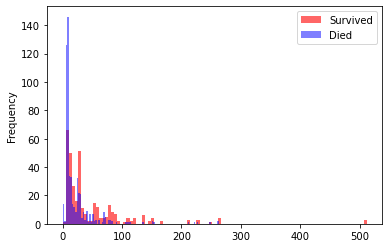

In [99]:
print(df_titanic["Fare"].min())
print(df_titanic["Fare"].max())

survived["Fare"].plot.hist(alpha=0.6,color='red',bins=100)
died["Fare"].plot.hist(alpha=0.5,color='blue',bins=100)
plt.legend(['Survived','Died'])
plt.show()

# prétraitement des données


In [100]:
#On redéfinit le DataFrame en supprimant les colones inutiles.
df_titanic = df_titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'])
print(df_titanic)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [101]:
#On remplace les âges manquant par des -1
#la fonction fillna permet de remplacer les valeurs manquantes par des x .fillna(-1)
df_titanic["Age"] = df_titanic["Age"].fillna(value = -1 )

labels=['Manquant','Enfant','Adolescent','Jeune Adulte','Adulte','Personne agée'];
intervalles =[-2,0,12,18,35,60,100]

#remplacement
#on nomme les paramètres en Python c'est important pour expliciter la paramétrisation (en inscrivant bins et labels).
df_titanic["Age"] = pd.cut(df_titanic["Age"], bins=intervalles, labels=labels)


In [102]:
print(df_titanic)

     Survived  Pclass     Sex           Age  SibSp  Parch     Fare Embarked
0           0       3    male  Jeune Adulte      1      0   7.2500        S
1           1       1  female        Adulte      1      0  71.2833        C
2           1       3  female  Jeune Adulte      0      0   7.9250        S
3           1       1  female  Jeune Adulte      1      0  53.1000        S
4           0       3    male  Jeune Adulte      0      0   8.0500        S
..        ...     ...     ...           ...    ...    ...      ...      ...
886         0       2    male  Jeune Adulte      0      0  13.0000        S
887         1       1  female  Jeune Adulte      0      0  30.0000        S
888         0       3  female      Manquant      1      2  23.4500        S
889         1       1    male  Jeune Adulte      0      0  30.0000        C
890         0       3    male  Jeune Adulte      0      0   7.7500        Q

[891 rows x 8 columns]


2- Codage binaire ou One-not-and-coding

In [103]:
#fonction qui permet de linéariser une variable qualitative en seuil binaire
def dummiesVariable(column_name,df):
    
    # Codage binaire dans un nouveau DataFrame
    dummies_features = pd.get_dummies(df[column_name],prefix=column_name)
    # Concaténation du DataFrame avec les nouvelles colonnes
    df = pd.concat([df,dummies_features],axis=1)
    # Suppression de la colonne initiale
    df = df.drop(columns=[column_name])
    # Affichage des 10 premières lignes
    print(df.head(10))
    return df

In [104]:
#on applique le code bianire à toutes les variables qualitatives (Age, Sex, Embarked)

df_titanic = dummiesVariable('Age',df_titanic)
df_titanic = dummiesVariable('Sex',df_titanic)
df_titanic = dummiesVariable('Embarked',df_titanic)
df_titanic = dummiesVariable('SibSp',df_titanic)
df_titanic = dummiesVariable('Pclass',df_titanic)
df_titanic

   Survived  Pclass     Sex  SibSp  Parch     Fare Embarked  Age_Manquant  \
0         0       3    male      1      0   7.2500        S             0   
1         1       1  female      1      0  71.2833        C             0   
2         1       3  female      0      0   7.9250        S             0   
3         1       1  female      1      0  53.1000        S             0   
4         0       3    male      0      0   8.0500        S             0   
5         0       3    male      0      0   8.4583        Q             1   
6         0       1    male      0      0  51.8625        S             0   
7         0       3    male      3      1  21.0750        S             0   
8         1       3  female      0      2  11.1333        S             0   
9         1       2  female      1      0  30.0708        C             0   

   Age_Enfant  Age_Adolescent  Age_Jeune Adulte  Age_Adulte  Age_Personne agée  
0           0               0                 1           0            

,Survived,Parch,Fare,Age_Manquant,Age_Enfant,Age_Adolescent,Age_Jeune Adulte,Age_Adulte,Age_Personne agée,Sex_female,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,0,0,7.2500,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,71.2833,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,7.9250,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,0,53.1000,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,8.0500,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
887,1,0,30.0000,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
888,0,2,23.4500,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
889,1,0,30.0000,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Entrainement des modèles

Maintenant que les données ont été traitées nous pouvons les exploiter enfin d'entrainer des modèles à reconnaitre les passagers
suceptibles d'avoir survécu ou non à la catastrophe.



### Séparation de y et des x

In [106]:
y = df_titanic['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [107]:
X = df_titanic.drop(columns=['Survived'])
print(X)

     Parch     Fare  Age_Manquant  Age_Enfant  Age_Adolescent  \
0        0   7.2500             0           0               0   
1        0  71.2833             0           0               0   
2        0   7.9250             0           0               0   
3        0  53.1000             0           0               0   
4        0   8.0500             0           0               0   
..     ...      ...           ...         ...             ...   
886      0  13.0000             0           0               0   
887      0  30.0000             0           0               0   
888      2  23.4500             1           0               0   
889      0  30.0000             0           0               0   
890      0   7.7500             0           0               0   

     Age_Jeune Adulte  Age_Adulte  Age_Personne agée  Sex_female  Sex_male  \
0                   1           0                  0           0         1   
1                   0           1                  0           

### Répartition entre le Train et le test

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,)

### Création et entrainement des modèles

#### Regression logistique

In [109]:
print(X_train)
print(y_train)

     Parch     Fare  Age_Manquant  Age_Enfant  Age_Adolescent  \
574      0   8.0500             0           0               1   
381      2  15.7417             0           1               0   
397      0  26.0000             0           0               0   
191      0  13.0000             0           0               0   
363      0   7.0500             0           0               0   
..     ...      ...           ...         ...             ...   
741      0  78.8500             0           0               0   
654      0   6.7500             0           0               1   
487      0  29.7000             0           0               0   
820      1  93.5000             0           0               0   
308      0  24.0000             0           0               0   

     Age_Jeune Adulte  Age_Adulte  Age_Personne agée  Sex_female  Sex_male  \
574                 0           0                  0           0         1   
381                 0           0                  0           

In [116]:
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle
lr = LogisticRegression(max_iter = 500)

# Apprentissage du modèle
prediction = lr.fit(X_train, y_train)

# Affichage des prédictions du modèles
lr_prediction = prediction.predict(X_test)

print(lr_prediction)
prediction.sc

[0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1]


#### Arbre de décision

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialisation du modèle
dtc = DecisionTreeClassifier()

# Apprentissage du modèle
dtc.fit(X_train,y_train)

# Affichage des prédictions du modèles
prediction = dtc.predict(X_test)
prediction



array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

#### Machine learning

In [119]:
from sklearn.neural_network import MLPClassifier

#initialisation du modèle
mlp = MLPClassifier()

#apprentissage
mlp.fit(X_train,y_train)

#vérification
prediction = mlp.predict(X_test)
prediction


C:\Users\tomdu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

## Justesse (accuracy)

La justesse c'est le nombre de prédictions sur le nombre total de prédictions

In [120]:
#justesse
print(lr.score(X_test,y_test))

print(dtc.score(X_test,y_test))

print(mlp.score(X_test,y_test))

0.8011204481792717
0.7983193277310925
0.8067226890756303


## matrice de confusion

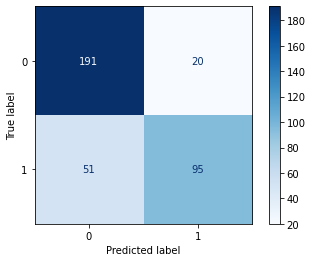

In [121]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)

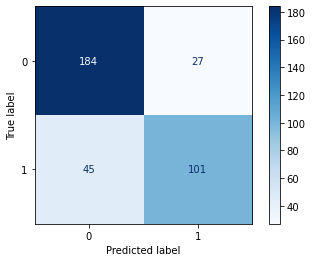

In [122]:
plot_confusion_matrix(dtc, X_test, y_test, cmap=plt.cm.Blues)

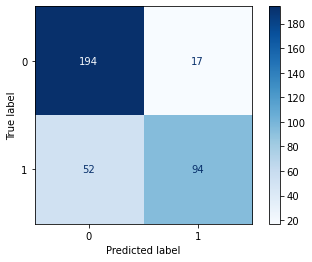

In [123]:
plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)